# Problem set 10: Feature expansion

## Summary and general instructions

**Calculate and work with textual features beyond token unigram counts to predict volume publication dates.**

We're going to work this week with **regression** rather than classification. This means that, rather than trying to predict a class label for each text, we'll try to estimate a continuous value for each text (in this case, the date of first publication of the book). We're also going to expand our feature set beyond unigram token counts.

Despite the move from classification to regression, the general `sklearn` workflow is similar. You'll still create features using a vectorizer of some sort, you'll still set up a predictor object (now a regressor rather than a classifier), you'll still fit your predictor to your feature data, and you'll still produce a vector of predictions (now in the form of numbers rather than discreet labels). You can still score and cross-validate your results, but now by measuring the coefficient of determination, $R^2$, rather than $F_1$.

We'll walk you through parts of this below. Good luck!

## Imports and setup

Recall that you can install SpaCy, if you haven't done so already, by running the following two lines in a code cell:

```
!conda install -c conda-forge spacy spacy-lookups-data -y
!python -m spacy download en_core_web_sm
```

In [1]:
# Imports
from   collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import requests
import seaborn as sns
from   sklearn.feature_extraction import DictVectorizer
from   sklearn.feature_extraction.text import TfidfVectorizer
from   sklearn.feature_selection import SelectKBest, mutual_info_regression
from   sklearn.linear_model import LinearRegression
from   sklearn.model_selection import cross_val_score
from   sklearn.preprocessing import StandardScaler
import spacy

In [2]:
# Working texts
# 10% samples of 40 US and GB novels
base_url = 'https://raw.githubusercontent.com/centre-for-humanities-computing/NER_workshop/master/texts_short/'
filenames = [
    'A-Alcott-Little_Women-1868-F.txt',
    'A-Cather-Antonia-1918-F.txt',
    'A-Chesnutt-Marrow-1901-M.txt',
    'A-Chopin-Awakening-1899-F.txt',
    'A-Crane-Maggie-1893-M.txt',
    'A-Davis-Life_Iron_Mills-1861-F.txt',
    'A-Dreiser-Sister_Carrie-1900-M.txt',
    'A-Freeman-Pembroke-1894-F.txt',
    'A-Gilman-Herland-1915-F.txt',
    'A-Harper-Iola_Leroy-1892-F.txt',
    'A-Hawthorne-Scarlet_Letter-1850-M.txt',
    'A-Howells-Silas_Lapham-1885-M.txt',
    'A-James-Golden_Bowl-1904-M.txt',
    'A-Jewett-Pointed_Firs-1896-F.txt',
    'A-London-Call_Wild-1903-M.txt',
    'A-Melville-Moby_Dick-1851-M.txt',
    'A-Norris-Pit-1903-M.txt',
    'A-Stowe-Uncle_Tom-1852-F.txt',
    'A-Twain-Huck_Finn-1885-M.txt',
    'A-Wharton-Age_Innocence-1920-F.txt',
    'B-Austen-Pride_Prejudice-1813-F.txt',
    'B-Bronte_C-Jane_Eyre-1847-F.txt',
    'B-Bronte_E-Wuthering_Heights-1847-F.txt',
    'B-Burney-Evelina-1778-F.txt',
    'B-Conrad-Heart_Darkness-1902-M.txt',
    'B-Dickens-Bleak_House-1853-M.txt',
    'B-Disraeli-Sybil-1845-M.txt',
    'B-Eliot-Middlemarch-1869-F.txt',
    'B-Forster-Room_View-1908-M.txt',
    'B-Gaskell-North_South-1855-F.txt',
    'B-Gissing-Grub_Street-1893-M.txt',
    'B-Hardy-Tess-1891-M.txt',
    'B-Mitford-Our_Village-1826-F.txt',
    'B-Radcliffe-Mysteries_Udolpho-1794-F.txt',
    'B-Shelley-Frankenstein-1818-F.txt',
    'B-Stevenson-Treasure_Island-1883-M.txt',
    'B-Thackeray-Vanity_Fair-1848-M.txt',
    'B-Trollope-Live_Now-1875-M.txt',
    'B-Wells-Time_Machine-1895-M.txt',
    'B-Woolf-Mrs_Dalloway-1925-F.txt'
]

# Randomize file order to avoid date sequence issues (B novels published earlier than A, on average)
random.shuffle(filenames)

# Use a dictionary to store full texts, keyed to file name
lit_texts = {}

# Pull texts from public GitHub (not our class site)
for f in filenames:
    lit_texts[f] = requests.get(base_url+f).text
    
# Gold labels (pub dates), parsed from filenames
y = [int(file.split('-')[3]) for file in filenames]

## 1. Simple vectorizer (5 points)

* Use the vectorizer below to create a feature matrix of normalized token counts for the 12 most frequently occurring words in the corpus. Your output matrix should have shape (40, 12). This is our **baseline** case. (3 points)
* Scale the feature matrix using a `StandardScaler()` object. (1 point)
* Print the resulting feature matrix shape and mean value (using `np.mean()`; it should be close to zero). (1 point)

In [3]:
# Vectorizer (freebie)
simple_vectorizer = TfidfVectorizer(
    input = 'content',
    encoding = 'utf-8',
    strip_accents = 'unicode',
    lowercase = True,
    min_df = 0.5,
    max_features = 12,
    use_idf=False
)

In [4]:
# Vectorize, scale, and print the shape and the mean of the scaled matrix

## 2. Simple linear regression (15 points)

Use a `LinearRegression()` object to predict the publication date of each novel in the corpus.

* Study the [`LinearRegression()` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* Note that the gold values, `y`, have already been supplied for you (see setup section above)
* Broadly speaking, you want to train your regressor by calling its `.fit()` method on your scaled input feature matrix and your gold labels, then use the fitted regressor to `.predict()` new y values given the same input. (5 points for fitting, 5 points for predicting)
    * This will provide a misleading sense of predictive performance, because training and testing on the same data encourages overfitting. We'll deal with this problem below.
* Plot your predicted publication dates as a function of the true publication dates. Nothing fancy needed, though +1 point if you do this with Seaborn's `regplot` to produce a line of best fit and a confidence interval. (5 points)

In [11]:
# Fit and predict using LinearRegression()

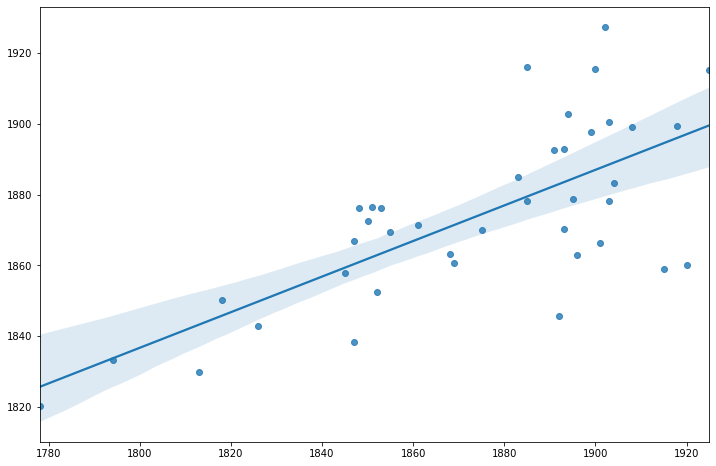

In [17]:
# Plot y_pred vs. y

## 3. Score your baseline regressor (15 points)

* First, score your trained regressor by calling its `.score()` method on the full input matrix and gold standard values. This calculates $R^2$, the coefficient of determination, which is an appropriate scoring metric for a regression problem. Print your score. It'll be somewhere near 0.5. (3 points)
* Second, use `sklearn`'s `cross_val_score` function to calculate a proper, non-overfitted $R^2$. Print your result. (7 points)
    * Use `scoring='r2'` and `cv=5` as parameters for your `cross_val_score`. 
    * See the [`cross_val_score` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) for implementation details.
    * Your cross-validated $R^2$ value will be around -1.5 or -2.0, which is *terrible*. It means that just guessing the mean publication date as your answer for *every* book would perform better than this regressor.
* We'll calculate these same scores several more times (using new feature data) in subsequent questions. Wrap up the calculations as a function, `compare_scores`, that takes a feature matrix and a vector of gold values, fits a `LinearRegressor` object, and prints both versions (naïve, overfitted `.score()` and 5-fold cross-validated) of the $R^2$ score. (5 points)
    * Call this function on your data to confirm that it works and that it produces the same results as the ones your just calculated.

In [21]:
# R^2, overfitted, using .score() on all data

# Proper cross-validated score

0.5028398959722384
-1.344733008030381


In [ ]:
# Function to compare true to naive regressor performance
def compare_scores(X, y):
    '''
    Takes a feature matrix and a set of gold labels.
    Fits a LinearRegressor and prints a naive R^2 score and a cross-validated R^2 score.
    Returns nothing.
    '''
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score

In [ ]:
# Call compare_scores on your full data

## 4. Lemmas (20 points)

* Write a function, `lemmatizer`, that uses spaCy to lemmatize an input string (10 points, of which 8 for the function and 2 for checking it on the sample text below)
    * This function should take an arbitrary string of text as input and return a list of lemmatized tokens
    * Your lemmatizer should remove punctuation and any "pure" whitespace tokens (look out in particular for `\n\n` pseudo-tokens)
* Use your lemmatizer function as an option with the supplied vectorizer to produce a feature matrix of the 12 most frequently occurring lemmas in the corpus.
* Scale the resulting features using a `StandardScaler` object. (5 points total for vectorizing and scaling)
* Finally, use your `compare_scores` function to fit a linear regressor on the scaled lemma features and report both the "naïve" and the cross-validated $R^2$ scores, calculated as in the previous question. (5 points for scoring)
    * Your $R^2$ values should be broadly similar to those calculated in the previous problem

FYI, vectorization with the lemmatizer takes about two minutes on my laptop (90 seconds if I cut corners and call an existing global `nlp` object from within the `lemmatizer` function, rather than setting up a new one for each text). NLP is slow, even when it's fast. This is also why we're  working with 10% samples of the novels rather than full texts.

You can check your lemmatizer by running it with the following string as input:

```
'''Her cats are \n\n   dancing faster, than the tallest dogs.'''
```

Your output should be:

```
['-PRON-', 'cat', 'be', 'dance', 'fast', 'than', 'the', 'tall', 'dog']
```

In [ ]:
# Write a preprocessor: tokenize and lemmatize as indicated
def lemmatizer(text):
    import spacy

In [ ]:
# Test your lemmatizer
test_string = '''Her cats are \n\n   dancing faster, than the tallest dogs.'''

In [ ]:
# Vectorizer (freebie)
lemma_vectorizer = TfidfVectorizer(
    input = 'content',
    encoding = 'utf-8',
    strip_accents = 'unicode',
    lowercase = True,
    tokenizer = lemmatizer,
    min_df = 0.5,
    max_features = 12,
    use_idf=False
)

In [ ]:
# Vectorize, scale, and score

## 5. Entities and POS tags (20 points)

* Use spaCy to count the number of entities and the number of tokens tagged with parts of speech of the indicated types (10 points)
    * Store your counts for each novel in a `Counter()` object or other dictionary-like structure
    * Store all of your counters in a list
    * This will require about the same amount of runtime as did the previous, lemmatized vectorization
* Use a `DictVectorizer` to transform your list of populated counters into a feature matrix (7 points)
* Scale the resulting matrix (1 point)
* Use the scaled matrix as input to your `compare_scores` function. Calculate and print both a naïve and a cross-validated $R^2$ value. (2 points)
    * Your performance won't be great. The cross-validated $R^2$ will still be negative.

In [ ]:
# Count entities and POS tags
valid_ent = ['PERSON', 'MONEY', 'TIME']
valid_pos = ['ADJ', 'ADV', 'AUX', 'CCONJ', 'DET', 'NOUN', 'PRON', 'PROPN', 'VERB']

In [ ]:
# Vectorize counts, scale, and score

## 6. Combined features (8 points)

* Combine your scaled, lemmatized features with your scaled, entity/POS features using `np.hstack` to produce a single feature matrix with shape (40, 24) (6 points)
* Use this combined feature set and your `compare_scores` function to calculate naïve and cross-validated $R^2$ scores for the same predition task as in the previous problems (2 points)
    * Note that your naïve $R^2$ has increased, but your cross-validated score has gotten worse!

In [ ]:
# Stack features and score

## 7. Select the best features (7 points)

Our problem is that we're overfitting. 

* Combat this problem by using `SelectKBest` to reduce your combined feature set to just the **five most informative features** (as determined by `mutual_info_regression` score) (5 points)
* Calculate, again, the naïve and cross-validated $R^2$ scores using the selected features and `compare_scores` (2 points)
    * Note that the naïve score has gone *way* down, but the cross-validated score has improved (though we're still performing worse than just guessing the mean publication date across the board)

In [ ]:
# Select 5 best features and score

## 8. Once more, from the top (10 points)

Let's reset and see if we can get performance better than random guessing.

* Vectorize as indicated below. Here, we lemmatize and keep all lemmas that occur in 2 or more documents, without a cap on the number of retained features. We also use IDF weighting. (1 point)
* Print the shape of the resulting feature matrix (1 point)
* Scale your features (1 point)
* Select the five most-informative features as scored by `mutual_info_regression` (5 points)
* Use `compare_scores` to print the naive and cross-validated $R^2$ scores for the linear regression classifier on the selected features (2 points)
    * You should now be performing better than random! My cross-validated $R^2$ is about 0.2. Not great, but better than anything we've seen above.

In [ ]:
# Vectorizer (freebie)

big_vectorizer = TfidfVectorizer(
    input = 'content',
    encoding = 'utf-8',
    strip_accents = 'unicode',
    lowercase = True,
    tokenizer = lemmatizer,
    min_df = 2,
    use_idf=True
)

In [ ]:
# Vectorize, scale, select, and score